# Pymaceuticals Inc.
---

### Analysis

- Ten drugs were tested across 248 unique mice for the study across various time points. 
- There were almost equal number of male (51%) and female (49%) mice used for the testing.
- Ramicane and Capomulin had the maximum number of observed timepoints. 
- Looking at all the central tendencies, these two also had the most improvement in Tumor Volume cosidering all mice had the same tumor volume of 45 mm3 at the start of the tests. 
- Ceftamin and Infubinol were third and fourth considering the Std Dev and SEM values. Hence we continued further statistical analysis for these four Drug Regimens.
- The vaiance, Std Dev and SEM for Tumor Volumes of mice treated by Ramicane were the least showing low variablility of the result. Capomulin showed the next best values.
- From the box plots of final tumor volumes for each dug regimen it can be seen that Capomulin had the smallest IQR with about 66% (2SD) results within a closer range and Ramicane had the smallest difference between first and 4th quartile suggesting 95% of the data are within a closer range compared to other drug regimen.
- From the box plots it can also be noted that median of Capomulin last tumor volumes does not coincide with the mean but is slightly higher whereas for Ramicane it seems more evenly distributed with them almost coinciding. Infubinol has an outlier in the results which might need to be analysed seperately for removal. Also those values for Ceftamin were the widest spread. 
- On plotting the tumor volume vs. time point for a single mouse l509 treated with Capomulin it could be seen that the tumor volume increased slightly before reducing after 20 days and then again increasing slightly at around 25 days before reducing further at 30 days before starting to slightly increase again at 35 days. 
- There is a positive and strong (0.84) correlation between weight of mouse and Average tumor volume showing better results of the drugs on lower weighted mice when plotted for Capomulin treated mice. 

### Assumptions

- This program will be using data sorted on timepoints similar to what is currently provided with this challenge
- For generating pie plots showing the distribution of female versus male mice we are considering each iteration of the mice and not just unique number of mice used in the experiments 
- The weight of each mice remains constant during the timeperiod of these experiments
- The initial tumor volumes is same across all mice used for these experiments similar to the data that is provided with this challenge 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata,
                                 how='left', on='Mouse ID')
    
# Displaying the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
num_of_mice = combined_data_df["Mouse ID"].nunique()
num_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_miceid = combined_data_df[combined_data_df[["Mouse ID","Timepoint"]].duplicated()]
dup_id = duplicate_miceid["Mouse ID"].unique()
dup_id

array(['g989'], dtype=object)

In [4]:
# Optional:Getting all the data for the duplicate mouse ID 
combined_data_df.loc[combined_data_df["Mouse ID"]=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID
clean_data_df = combined_data_df.loc[combined_data_df["Mouse ID"] !='g989']
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame
num_of_mice = clean_data_df["Mouse ID"].nunique()
num_of_mice

248

## Summary Statistics

In [7]:
# Using the aggregation method, generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = clean_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': [('Mean','mean'), ('Median', 'median'), 
                                                                                ('var','var'), ('std','std'), ('sem','sem')]})                                                                           
summary_df 

Tumor Volume (mm3)                                          
                           Mean     Median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

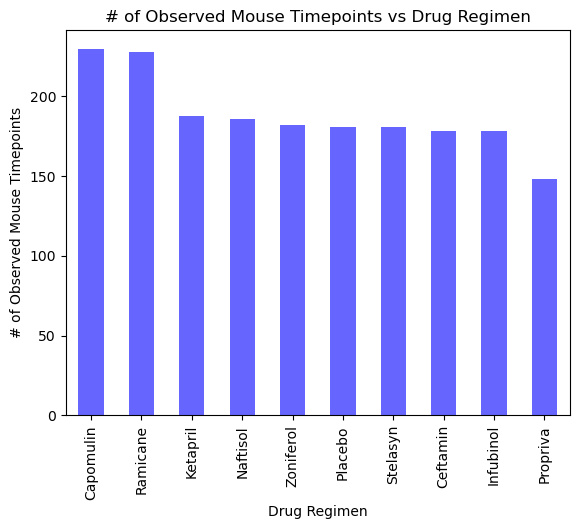

In [8]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas

# Counting the number of rows for each Drug Regimen by grouping on it
mouse_timepoints = clean_data_df.groupby("Drug Regimen")["Mouse ID"].count()

# Sorting the resulting series so that highest value is on the left and lowest on right
sorted_series = mouse_timepoints.sort_values(ascending=False)
drug_chart = sorted_series.plot(kind="bar", color="blue", alpha = 0.6, figsize=(6.5,5))
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("# of Observed Mouse Timepoints")
drug_chart.set_title("# of Observed Mouse Timepoints vs Drug Regimen")
plt.show()

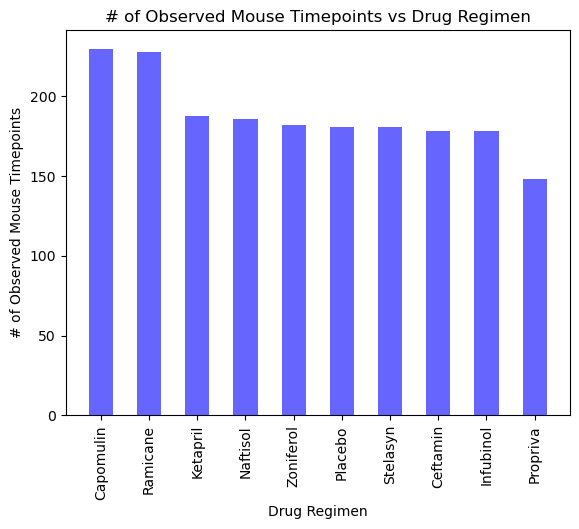

In [9]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Creating an array of unique Drug Regimen for x-axis 
x_axis = np.arange(len(clean_data_df["Drug Regimen"].unique()))

# Setting tick locations
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6.5,5))
plt.bar(x_axis, sorted_series, color='b', alpha=0.6, width =0.5, align="center")

#Adding vertically aligned labels to tick locations
plt.xticks(tick_locations, sorted_series.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("# of Observed Mouse Timepoints vs Drug Regimen")
plt.show()

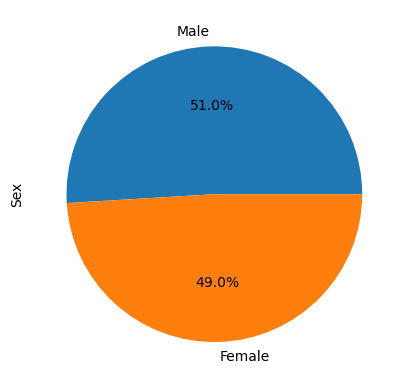

In [10]:
# Generating a pie plot showing the distribution of female versus male mice using Pandas
# * Assumption we are considering each iteration of the mice and not just unique number of mice used in the experiments   
count_mouse_gender = clean_data_df["Sex"].value_counts()
mouse_gender_pie = count_mouse_gender.plot(kind="pie", y = count_mouse_gender,  autopct="%1.1f%%", legend=False)
mouse_gender_pie.set_ylabel("Sex")
plt.show()

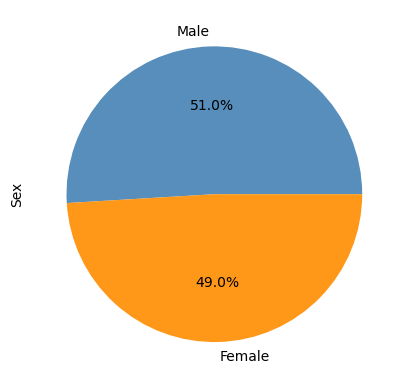

In [11]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot
gender = count_mouse_gender.index
colours = ["steelblue", "darkorange"]
plt.pie(count_mouse_gender, labels=gender, colors=colours, wedgeprops={"alpha": 0.9},autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting all the data corresponding to last (greatest) timepoint for each mouse including Tumor Volume
# Since the data is already sorted on timepoints this step will be sufficient to get the desired data
max_timepoint_data = clean_data_df.groupby("Mouse ID").last()
max_timepoint = max_timepoint_data.reset_index()

In [13]:
# Putting treatments into a list for for loop     
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty Series to fill with tumor vol data (for plotting) since it will be helpful to save along with corresponding Drug Regimen
# we can avoid need for additional for loop later
tumor_vol = pd.Series( dtype=np.float64)

# Looping through each concerned Drug Regimen
for s in treatment:  
    # Locate the rows which contain mice on each drug and get corresponding final tumor volumes
    # Save them in the series
    tumor_vol[s] = max_timepoint["Tumor Volume (mm3)"].loc[max_timepoint["Drug Regimen"]== s]
    # Calculating the IQR and quantitatively determining if there are any potential outliers 
    quartiles = tumor_vol[s].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq #IQR for each treatment type
    # Determining outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol[s].loc[( tumor_vol[s]> upper_bound)|(tumor_vol[s]< lower_bound)]
    print(f"{s}'s potential outliers: {outliers}")  

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


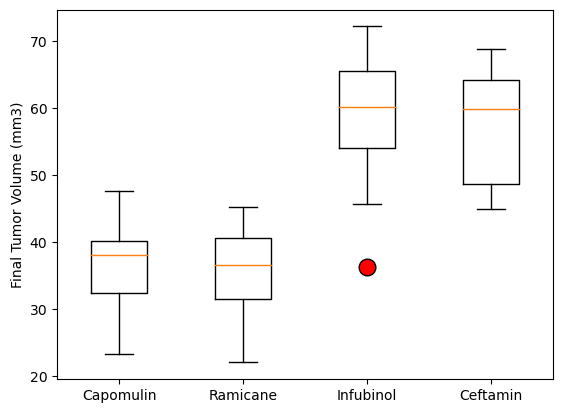

In [14]:
# Generating a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='0')
ax.boxplot(tumor_vol,flierprops=flierprops)
ax.set_xticks(np.arange(len(treatment))+1,treatment)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

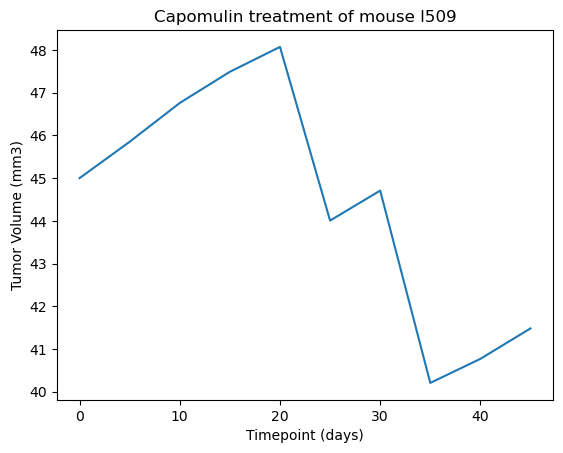

In [15]:
# Generating a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id_forplot = "l509"
drug_regimen_forplot = "Capomulin"

# Checking condition for data with single mouse treated with Capomulin
data = clean_data_df.loc[(clean_data_df["Drug Regimen"]==drug_regimen_forplot) &\
                                   (clean_data_df["Mouse ID"]==mouse_id_forplot) ]
# Generating a line Plot
plot_data = data[["Timepoint","Tumor Volume (mm3)"]]
plot_data = plot_data.set_index("Timepoint")
line_plot = plot_data.plot(legend = False)
line_plot.set_xlabel("Timepoint (days)")
line_plot.set_ylabel("Tumor Volume (mm3)")
line_plot.set_title(f"{drug_regimen_forplot} treatment of mouse {mouse_id_forplot}")
plt.show()

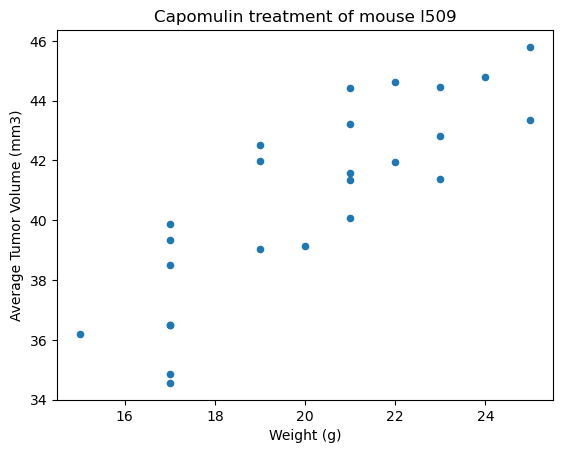

In [16]:
# Generating a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Getting all data for Capomulin
drug_regimen_data = clean_data_df.loc[(clean_data_df["Drug Regimen"]==drug_regimen_forplot)]

# Calculating the average tumor volume for each Mouse ID
drug_regimen_data=drug_regimen_data.set_index("Mouse ID")
drug_regimen_avgvol = drug_regimen_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
drug_regimen_data["Average Tumor Volume (mm3)"] = drug_regimen_avgvol

# Keeping only required columns for plotting in an object and reoving any duplicates
scatter_data = drug_regimen_data[["Weight (g)","Average Tumor Volume (mm3)"]]
scatter_data_unique =scatter_data[~scatter_data.duplicated()]

# Generating the required scatter plot
scatter_plot = scatter_data_unique.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)") 
scatter_plot.set_title(f"{drug_regimen_forplot} treatment of mouse {mouse_id_forplot}")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


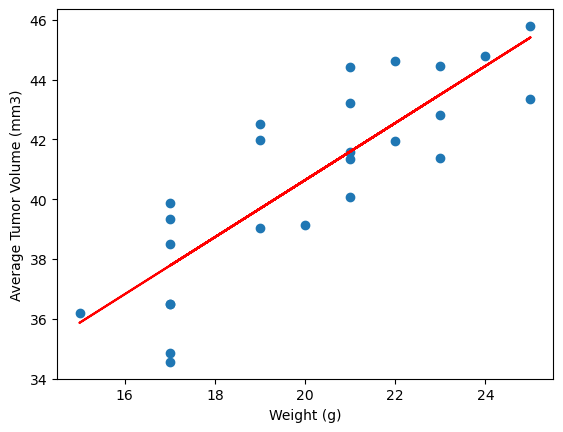

In [17]:
# Calculating the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculating the pearson correlation between mouse weight and average obseved tumor volume
correlation = st.pearsonr(scatter_data_unique["Weight (g)"], scatter_data_unique["Average Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Generating a scatter plot and linear regression model
x_values = scatter_data_unique["Weight (g)"]
y_values = scatter_data_unique["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values) # Determining parameters for linear regression model
regress_values = x_values * slope + intercept # Creating and saving formula for linear regression line for plotting
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()